In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

# Data Wrangling

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank_project/bank_data.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Data Preprocessing

In [ ]:
data.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
# show unique values in categorical columns
print('Jobs', data['job'].unique(),  '\n' + '\n',
'Marital Status', data['marital'].unique(),  '\n' + '\n',
'Education Level' , data['education'].unique(),  '\n' + '\n',
'Housing', data['housing'].unique(),  '\n' + '\n',
'Loan', data['loan'].unique() ,  '\n' + '\n',
'Default' ,data['default'].unique())

Jobs ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student'] 

 Marital Status ['married' 'single' 'divorced' nan] 

 Education Level ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate'] 

 Housing ['no' 'yes' nan] 

 Loan ['no' 'yes' nan] 

 Default ['no' nan 'yes']


In [ ]:
## Fill missing values of categorical variables with mode

In [ ]:
cols = (data[['job', 'marital', 'education', 'housing', 'loan', 'default']]).mode()

data[['job', 'marital', 'education', 
      'housing', 'loan', 'default']] = data[['job', 'marital', 'education', 
                                             'housing', 'loan', 'default']].fillna(value = cols.iloc[0])

In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Exploratory Data Analysis

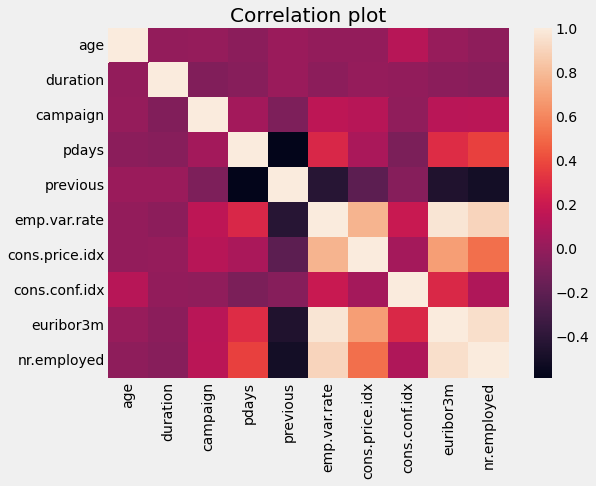

In [ ]:
plt.rcParams["figure.figsize"] = [8 , 6]
plt.title('Correlation plot')
sns.heatmap(data.corr())
plt.show()

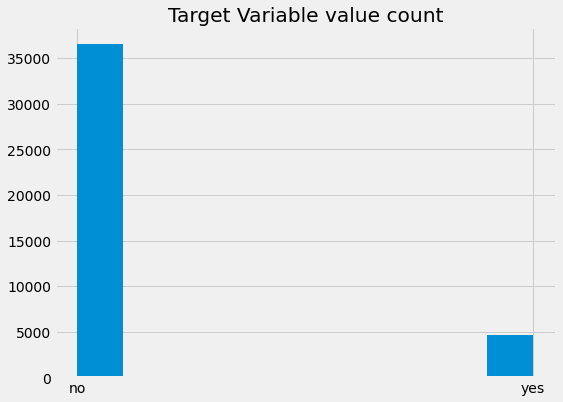

In [ ]:
data['y'].hist()
plt.title('Target Variable value count')
plt.show()

In [ ]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

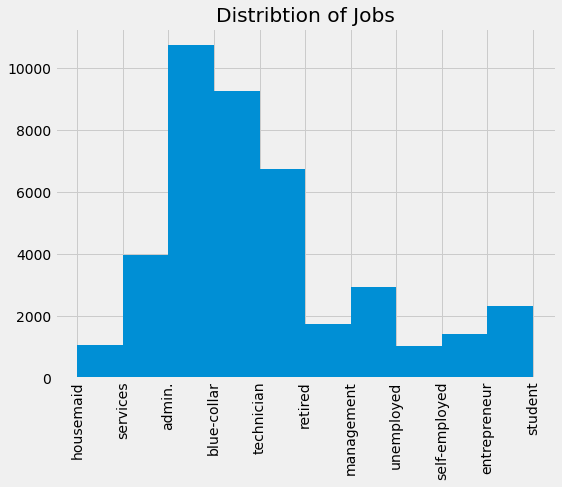

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data['job'], bins=10)
plt.xticks(rotation = 90)
plt.title('Distribtion of Jobs')
plt.show()

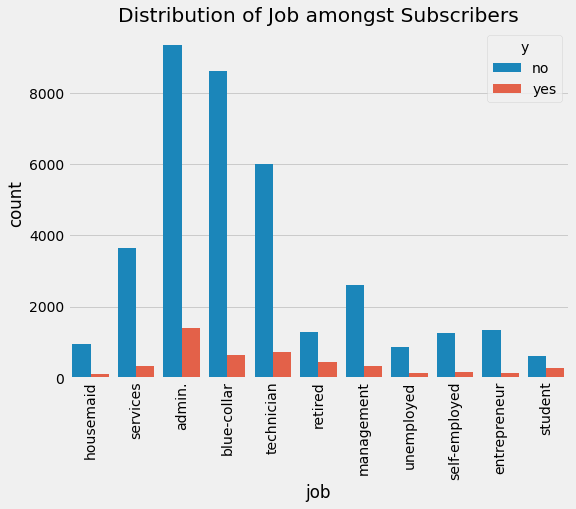

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="job", hue="y", data=data)
plt.title('Distribution of Job amongst Subscribers')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


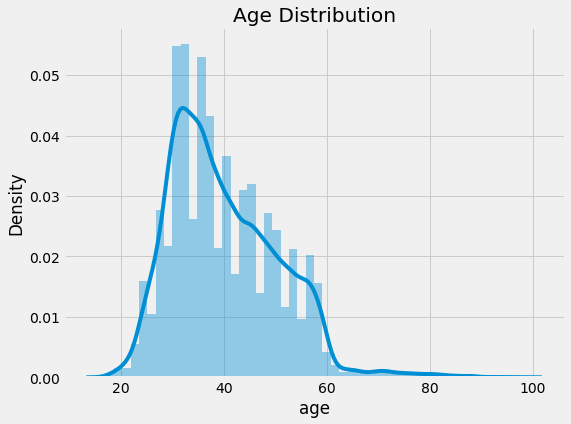

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

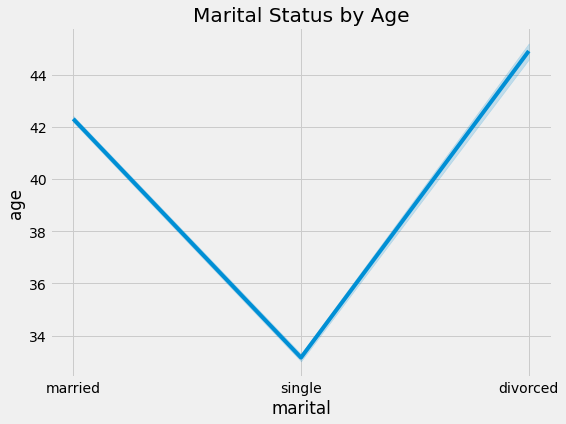

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(x="marital", y="age", data=data)
plt.title('Marital Status by Age')
plt.show()

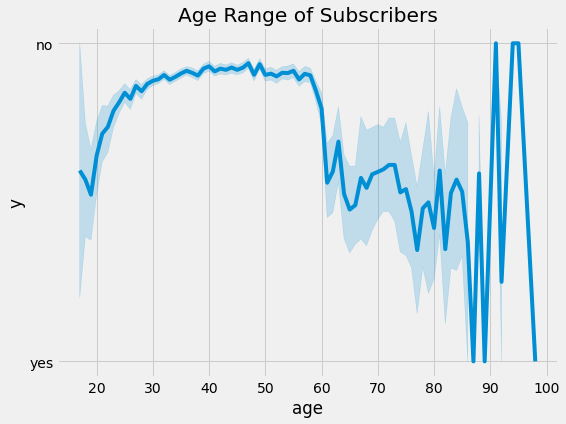

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(x="age", y="y", data=data)
plt.title('Age Range of Subscribers')
plt.show()

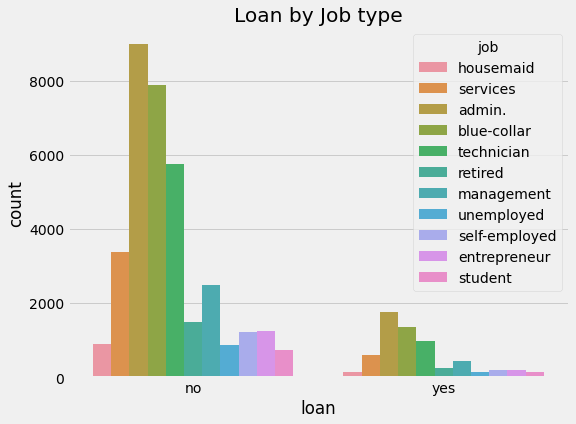

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='loan',hue='job', data=data)
plt.title('Loan by Job type')
plt.show()

# Feature Engineering

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Drop highly correlated features

In [ ]:
cor_matrix = data.corr().abs()
print(cor_matrix)

                     age  duration  campaign     pdays  previous  \
age             1.000000  0.000866  0.004594  0.034369  0.024365   
duration        0.000866  1.000000  0.071699  0.047577  0.020640   
campaign        0.004594  0.071699  1.000000  0.052584  0.079141   
pdays           0.034369  0.047577  0.052584  1.000000  0.587514   
previous        0.024365  0.020640  0.079141  0.587514  1.000000   
emp.var.rate    0.000371  0.027968  0.150754  0.271004  0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889  0.203130   
cons.conf.idx   0.129372  0.008173  0.013733  0.091342  0.050936   
euribor3m       0.010767  0.032897  0.135133  0.296899  0.454494   
nr.employed     0.017725  0.044703  0.144095  0.372605  0.501333   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                 0.000371        0.000857       0.129372   0.010767   
duration            0.027968        0.005312       0.008173   0.032897   
campaign            0.150754 

In [ ]:
upper_triangle = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_triangle)

                age  duration  campaign     pdays  previous  emp.var.rate  \
age             NaN  0.000866  0.004594  0.034369  0.024365      0.000371   
duration        NaN       NaN  0.071699  0.047577  0.020640      0.027968   
campaign        NaN       NaN       NaN  0.052584  0.079141      0.150754   
pdays           NaN       NaN       NaN       NaN  0.587514      0.271004   
previous        NaN       NaN       NaN       NaN       NaN      0.420489   
emp.var.rate    NaN       NaN       NaN       NaN       NaN           NaN   
cons.price.idx  NaN       NaN       NaN       NaN       NaN           NaN   
cons.conf.idx   NaN       NaN       NaN       NaN       NaN           NaN   
euribor3m       NaN       NaN       NaN       NaN       NaN           NaN   
nr.employed     NaN       NaN       NaN       NaN       NaN           NaN   

                cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
age                   0.000857       0.129372   0.010767     0.017725  
duration

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
col_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]
print(); print(col_to_drop)


['euribor3m']


In [ ]:
data = data.drop('euribor3m', axis=1)

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'nr.employed', 'y'],
      dtype='object')

## Perform Label Encoding on Categegorical features

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome','y']

# Encode labels of multiple categorical columns at once

data[cols] = data[cols].apply(le.fit_transform)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,5191.0,0
1,57,7,1,3,0,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,5191.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# convert float datatype to int
cols = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']
data[cols] = data[cols].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             41188 non-null  int64
 1   job             41188 non-null  int64
 2   marital         41188 non-null  int64
 3   education       41188 non-null  int64
 4   default         41188 non-null  int64
 5   housing         41188 non-null  int64
 6   loan            41188 non-null  int64
 7   contact         41188 non-null  int64
 8   month           41188 non-null  int64
 9   day_of_week     41188 non-null  int64
 10  duration        41188 non-null  int64
 11  campaign        41188 non-null  int64
 12  pdays           41188 non-null  int64
 13  previous        41188 non-null  int64
 14  poutcome        41188 non-null  int64
 15  emp.var.rate    41188 non-null  int64
 16  cons.price.idx  41188 non-null  int64
 17  cons.conf.idx   41188 non-null  int64
 18  nr.employed     41188 non-

# Feature selection

In [ ]:
X = data.drop(['y'], axis =1)
y = data['y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Working with imbalanced data




### Here y label is imbalanced with values

  ```
  data['y'].value_counts()
  no     36548
  yes     4640
  Name: y, dtype: int64
  ```



## Model Development using Deep Learning Framework

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [ ]:
history = model.fit(
    X_train, y_train, 
    epochs= 5,
   validation_data = (X_test, y_test)
   )

Epoch 1/5
1030/1030 [==============================] - 12s 8ms/step - loss: 0.2101 - accuracy: 0.9044 - precision: 0.6024 - recall: 0.4512 - val_loss: 0.1888 - val_accuracy: 0.9159 - val_precision: 0.6323 - val_recall: 0.5876
Epoch 2/5
1030/1030 [==============================] - 7s 7ms/step - loss: 0.1965 - accuracy: 0.9095 - precision: 0.6200 - recall: 0.5125 - val_loss: 0.1829 - val_accuracy: 0.9204 - val_precision: 0.6582 - val_recall: 0.5952
Epoch 3/5
1030/1030 [==============================] - 5s 5ms/step - loss: 0.1925 - accuracy: 0.9101 - precision: 0.6257 - recall: 0.5085 - val_loss: 0.1904 - val_accuracy: 0.9122 - val_precision: 0.5950 - val_recall: 0.6681
Epoch 4/5
1030/1030 [==============================] - 3s 3ms/step - loss: 0.1893 - accuracy: 0.9114 - precision: 0.6319 - recall: 0.5171 - val_loss: 0.1775 - val_accuracy: 0.9185 - val_precision: 0.6777 - val_recall: 0.5147
Epoch 5/5
1030/1030 [==============================] - 3s 3ms/step - loss: 0.1864 - accuracy: 0.911

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                600       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 921
Trainable params: 921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
score = model.evaluate(X_test, y_test)

258/258 [==============================] - 1s 2ms/step - loss: 0.1868 - accuracy: 0.9170 - precision: 0.6135 - recall: 0.6910


In [ ]:
y_pred = model.predict(X_test)
y_pred_NP =  np.round(y_pred)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_NP))
print(classification_report(y_test,y_pred_NP))
print('Base Model NN Accuracy: ', accuracy_score(y_test, y_pred_NP))

Confusion Matrix: 
 [[6919  400]
 [ 284  635]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7319
           1       0.61      0.69      0.65       919

    accuracy                           0.92      8238
   macro avg       0.79      0.82      0.80      8238
weighted avg       0.92      0.92      0.92      8238

Decision Tree Accuracy:  0.9169701383831027


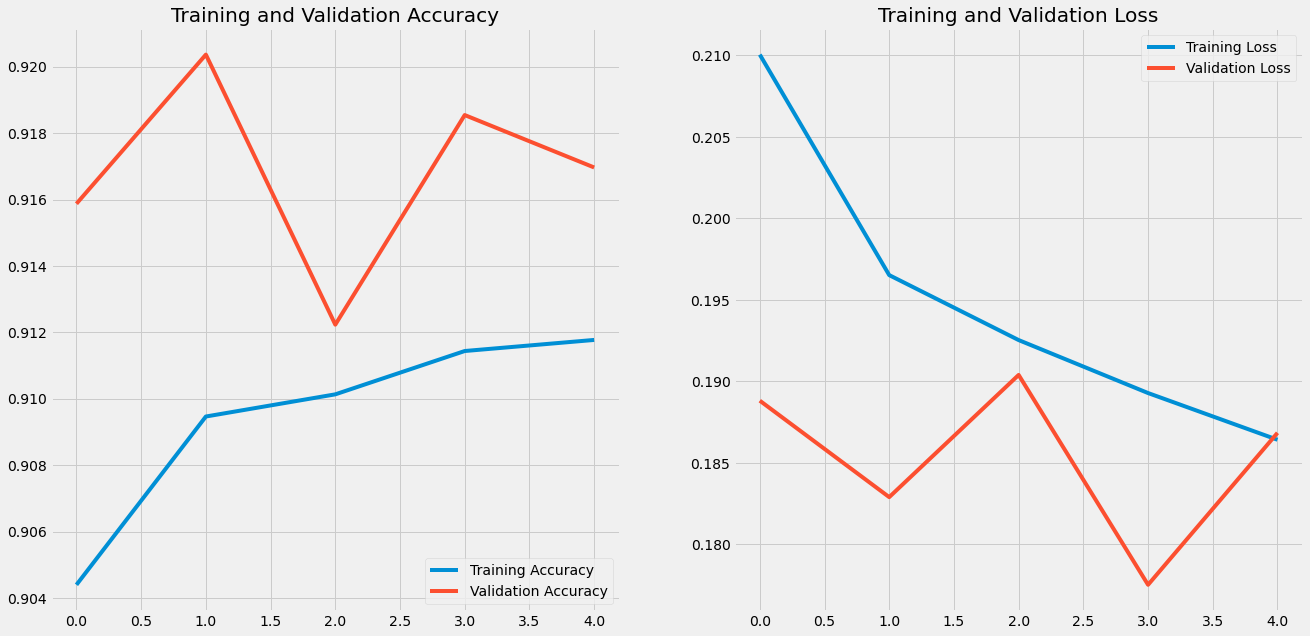

In [ ]:
## plotting loss and accuracy
import matplotlib.pyplot as plt

train_acc =history.history['accuracy']
val_acc = history.history['val_accuracy']


train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



### Using Random Search to optimize the model

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 98 kB 3.7 MB/s 


In [ ]:
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def tune_model(hp):
    model = Sequential()
    for n in range(hp.Int('num_layers', 2, 10, 15)):
        model.add(Dense(units=hp.Int('units_' + str(n),
                                     min_value=32,
                                     max_value=100,
                                     step=10),
                        activation = 'relu')
        )   
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(
        tf.keras.optimizers.Adam(
            lr = hp.Choice('learning_rate', [1e-1, 1e-2, 1e-3]) 
        ),
        loss = 'binary_crossentropy',
        metrics = ['accuracy']
    )
    return model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [ ]:
tuner = RandomSearch(
    tune_model,
    objective = 'accuracy',
    max_trials = 5,
    executions_per_trial=2,
    directory = 'Bank Marketing',
    project_name = 'Bank Subscribers '
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 15, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 10, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 10, 'sampling': None}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001], 'ordered': True}


In [ ]:
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))
best_model = tuner.get_best_models()[0]

Trial 5 Complete [00h 02m 32s]
accuracy: 0.916221559047699

Best accuracy So Far: 0.9259939193725586
Total elapsed time: 00h 13m 51s
INFO:tensorflow:Oracle triggered exit


In [ ]:
two_models = tuner.get_best_models(num_models=2)
best_model = two_models[0]
best_model.build(input_shape=(None,19))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
best_model.compile(
        tf.keras.optimizers.Adam(learning_rate=0.01),
        loss = 'binary_crossentropy',
        metrics = ['accuracy'])

best_model_history = best_model.fit(
                          X_train, y_train, 
                          epochs=10, 
                          validation_data=(X_test, y_test))

Epoch 1/10
1030/1030 [==============================] - 5s 4ms/step - loss: 0.1987 - accuracy: 0.9078 - val_loss: 0.1870 - val_accuracy: 0.9081
Epoch 2/10
1030/1030 [==============================] - 5s 5ms/step - loss: 0.1914 - accuracy: 0.9086 - val_loss: 0.1877 - val_accuracy: 0.9058
Epoch 3/10
1030/1030 [==============================] - 7s 6ms/step - loss: 0.1880 - accuracy: 0.9093 - val_loss: 0.1789 - val_accuracy: 0.9204
Epoch 4/10
1030/1030 [==============================] - 7s 7ms/step - loss: 0.1851 - accuracy: 0.9113 - val_loss: 0.1803 - val_accuracy: 0.9204
Epoch 5/10
1030/1030 [==============================] - 8s 8ms/step - loss: 0.1833 - accuracy: 0.9101 - val_loss: 0.1874 - val_accuracy: 0.9153
Epoch 6/10
1030/1030 [==============================] - 7s 7ms/step - loss: 0.1819 - accuracy: 0.9119 - val_loss: 0.1769 - val_accuracy: 0.9178
Epoch 7/10
1030/1030 [==============================] - 7s 7ms/step - loss: 0.1818 - accuracy: 0.9124 - val_loss: 0.2334 - val_accuracy:

In [ ]:
score_RS = best_model.evaluate(X_test, y_test)

258/258 [==============================] - 1s 2ms/step - loss: 0.1825 - accuracy: 0.9101


In [ ]:
y_pred_RS = best_model.predict(X_test)
y_pres_RS_NP = np.round(y_pred_RS)

print('Confusion Matrix: \n',confusion_matrix(y_test, y_pres_RS_NP))
print(classification_report(y_test, y_pres_RS_NP))
print('Random search Model Accuracy: ', accuracy_score(y_test, y_pres_RS_NP))

Confusion Matrix: 
 [[7164  155]
 [ 586  333]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7319
           1       0.68      0.36      0.47       919

    accuracy                           0.91      8238
   macro avg       0.80      0.67      0.71      8238
weighted avg       0.90      0.91      0.90      8238

Random search Model Accuracy:  0.9100509832483612


### COMPARISON BETWEEN THE BASE AND OPTIMIZED MODEL ON IMBALANCED DATASET

In [3]:
df = {'Models': ["Base", "Optimized"],
        "Train_acc": [0.9118, 0.9123],
        "Train_loss": [0.1864, 0.1788],
        "Train_Recall": [0.52, '-'],
        "Train_precision": [0.63, '-'],
        "Validation_acc": [0.9170, 0.9101],
        "Validation_loss": [0.1868, 0.1825],
        "Validation_Recall": [0.69, 0.67],
        "Validation_precision": [0.61, 0.80],
        "Epochs": [5, 10]
        }
model_comparison = pd.DataFrame(data = df)

# display the table of performance comparison
model_comparison

,Models,Train_acc,Train_loss,Train_Recall,Train_precision,Validation_acc,Validation_loss,Validation_Recall,Validation_precision,Epochs
0,Base,0.9118,0.1864,0.52,0.63,0.9170,0.1868,0.69,0.61,5
1,Optimized,0.9123,0.1788,-,-,0.9101,0.1825,0.67,0.80,10


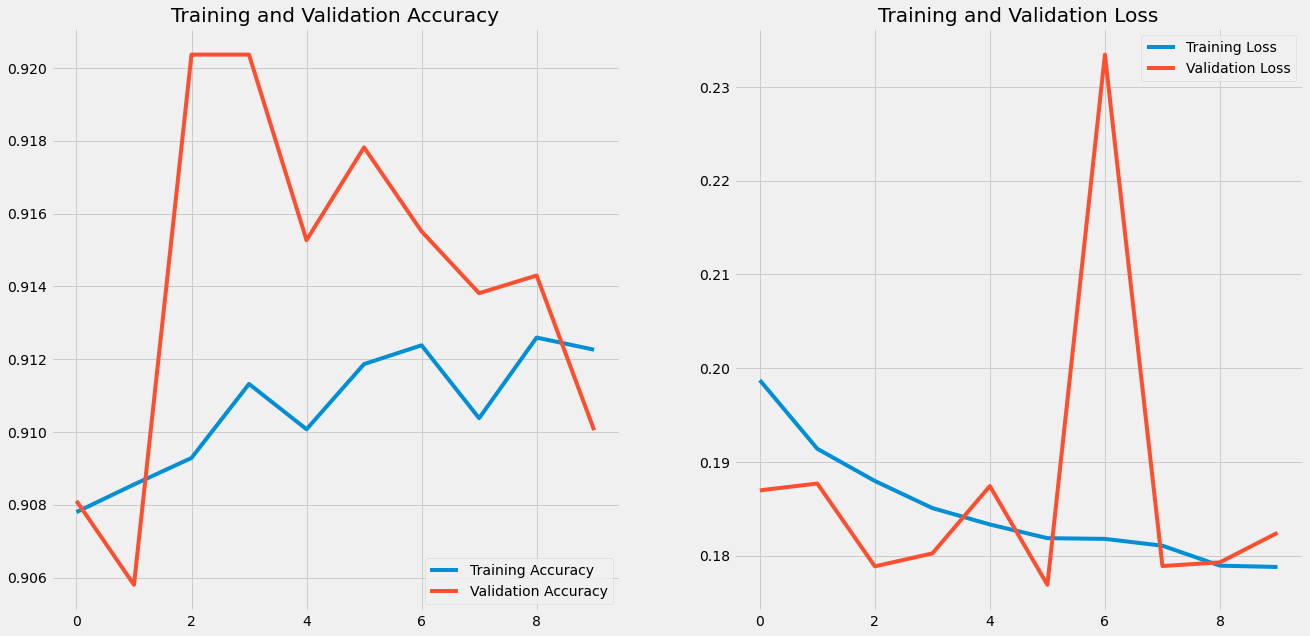

In [ ]:
best_train_acc = best_model_history.history['accuracy']
best_val_acc = best_model_history.history['val_accuracy']

#losses
best_train_loss = best_model_history.history['loss']
best_val_loss = best_model_history.history['val_loss']
epochs_range = range(10)
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, best_train_acc, label='Training Accuracy')
plt.plot(epochs_range, best_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, best_train_loss, label='Training Loss')
plt.plot(epochs_range, best_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model Development Using Traditional Machine Learning Models

### Modelling using Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT_clf = DecisionTreeClassifier()
DT_clf = DT_clf.fit(X_train,y_train)

y_pred_DT = DT_clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_DT))
print(classification_report(y_test,y_pred_DT))
print('Random search model Accuracy: ', accuracy_score(y_test, y_pred_DT))

Confusion Matrix: 
 [[6831  488]
 [ 433  486]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7319
           1       0.50      0.53      0.51       919

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238

Random search model Accuracy:  0.8882010196649672


### Modelling using Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB_clf = DecisionTreeClassifier()
NB_clf = NB_clf.fit(X_train,y_train)

y_pred_NB = NB_clf.predict(X_test)

In [ ]:
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_NB))
print(classification_report(y_test,y_pred_NB))
print('Naive Bayes Accuracy : ', accuracy_score(y_test, y_pred_NB))

Confusion Matrix: 
 [[6832  487]
 [ 438  481]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7319
           1       0.50      0.52      0.51       919

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238

Naive Bayes Accuracy :  0.8877154649186696


### Modelling using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LR_clf = DecisionTreeClassifier()
LR_clf = LR_clf.fit(X_train,y_train)

y_pred_LR = LR_clf.predict(X_test)

In [ ]:
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_LR))
print(classification_report(y_test,y_pred_LR))
print('Logistic Regression Accuracy : ', accuracy_score(y_test, y_pred_LR))

Confusion Matrix: 
 [[6839  480]
 [ 426  493]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7319
           1       0.51      0.54      0.52       919

    accuracy                           0.89      8238
   macro avg       0.72      0.74      0.73      8238
weighted avg       0.89      0.89      0.89      8238

Logistic Regression Accuracy :  0.8900218499635834


### Modelling using Support Vector Machine

In [ ]:
from sklearn import svm

SVM_clf = svm.SVC(kernel='linear')
SVM_clf = SVM_clf.fit(X_train,y_train)
y_pred_SVM = SVM_clf.predict(X_test)

In [ ]:
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_SVM))
print(classification_report(y_test,y_pred_SVM))
print('Support Vector Machine Accuracy : ', accuracy_score(y_test, y_pred_SVM))

Confusion Matrix: 
 [[7179  140]
 [ 678  241]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7319
           1       0.63      0.26      0.37       919

    accuracy                           0.90      8238
   macro avg       0.77      0.62      0.66      8238
weighted avg       0.88      0.90      0.88      8238

Support Vector Machine Accuracy :  0.9007040543821316


## Metrics Comparision for imbalanced dataset

In [4]:
df = {'Models': ["Feed Forward NN", "Feed Forward NN with RandomSearh tuned hyperparameter", "Decision Tree","Naive Bayes","Logistic Regression","Support Vector Machine"],
        "Accuracy Score": [0.9170, 0.9101, 0.8892, 0.8882, 0.8891, 0.8648],
        "Precision": [61, 80, 72, 72, 72, 77],
        "Recall": [69, 67, 73, 72, 73, 62],
        "F1-score": [65, 47, 51, 51, 52, 37]}
        
model_comparison = pd.DataFrame(data = df)

# display the table of performance comparison
model_comparison

,Models,Accuracy Score,Precision,Recall,F1-score
0,Feed Forward NN,0.9170,61,69,65
1,Feed Forward NN with RandomSearh tuned hyperpa...,0.9101,80,67,47
2,Decision Tree,0.8892,72,73,51
3,Naive Bayes,0.8882,72,72,51
4,Logistic Regression,0.8891,72,73,52
5,Support Vector Machine,0.8648,77,62,37


# Working with balanced data.







In [ ]:
# read the data again
new_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank_project/bank_data.csv')

# fill missing values for categorical variables
cols = (new_data[['job', 'marital', 'education', 'housing', 'loan', 'default']]).mode()

new_data[['job', 'marital', 'education', 
      'housing', 'loan', 'default']] = new_data[['job', 'marital', 'education', 
                                             'housing', 'loan', 'default']].fillna(value = cols.iloc[0])
# drop highly correlated feature
new_data = new_data.drop('euribor3m', axis=1)

---
#### Oversampling to improve model training

##### Here i'll oversample the target label `y` to avoid overfitting and underfitting.


In [ ]:
new_data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [ ]:
d1=new_data.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
new_data=d1

In [ ]:
new_data['y'].value_counts()

yes    37120
no     36548
Name: y, dtype: int64

In [ ]:
# Encode labels of multiple categorical columns at once
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome','y']

new_data[cols] = new_data[cols].apply(le.fit_transform)

# convert float datatype to int
cols = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']
new_data[cols] = new_data[cols].astype(int)

In [ ]:
# select dependent and independent variables
X = new_data.drop(['y'], axis =1)
y = new_data['y']

# perform train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# scale variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Development using Deep Learning Framework

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [ ]:
history = model.fit(
    X_train, y_train, 
    epochs= 5,
   validation_data = (X_test, y_test)
   )

Epoch 1/5
1842/1842 [==============================] - 12s 5ms/step - loss: 0.3112 - accuracy: 0.8712 - precision: 0.8356 - recall: 0.9259 - val_loss: 0.2888 - val_accuracy: 0.8794 - val_precision: 0.8415 - val_recall: 0.9403
Epoch 2/5
1842/1842 [==============================] - 9s 5ms/step - loss: 0.2858 - accuracy: 0.8847 - precision: 0.8465 - recall: 0.9413 - val_loss: 0.2825 - val_accuracy: 0.8843 - val_precision: 0.8595 - val_recall: 0.9239
Epoch 3/5
1842/1842 [==============================] - 12s 6ms/step - loss: 0.2773 - accuracy: 0.8882 - precision: 0.8542 - recall: 0.9374 - val_loss: 0.2717 - val_accuracy: 0.8881 - val_precision: 0.8632 - val_recall: 0.9272
Epoch 4/5
1842/1842 [==============================] - 8s 4ms/step - loss: 0.2728 - accuracy: 0.8893 - precision: 0.8545 - recall: 0.9398 - val_loss: 0.2670 - val_accuracy: 0.8913 - val_precision: 0.8507 - val_recall: 0.9539
Epoch 5/5
1842/1842 [==============================] - 8s 5ms/step - loss: 0.2690 - accuracy: 0.89

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                600       
                                                                 
 dense_4 (Dense)             (None, 10)                310       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 921
Trainable params: 921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
score = model.evaluate(X_test, y_test)

461/461 [==============================] - 1s 2ms/step - loss: 0.2650 - accuracy: 0.8911 - precision: 0.8624 - recall: 0.9354


In [ ]:
y_pred = model.predict(X_test)
y_pred_NP = np.round(y_pred)

print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_NP))
print(classification_report(y_test,y_pred_NP))
print('Base Model NN Accuracy: ', accuracy_score(y_test, y_pred_NP))

Confusion Matrix: 
 [[6111 1120]
 [ 485 7018]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.88      7231
           1       0.86      0.94      0.90      7503

    accuracy                           0.89     14734
   macro avg       0.89      0.89      0.89     14734
weighted avg       0.89      0.89      0.89     14734

Base Model NN Accuracy:  0.8910682774535089


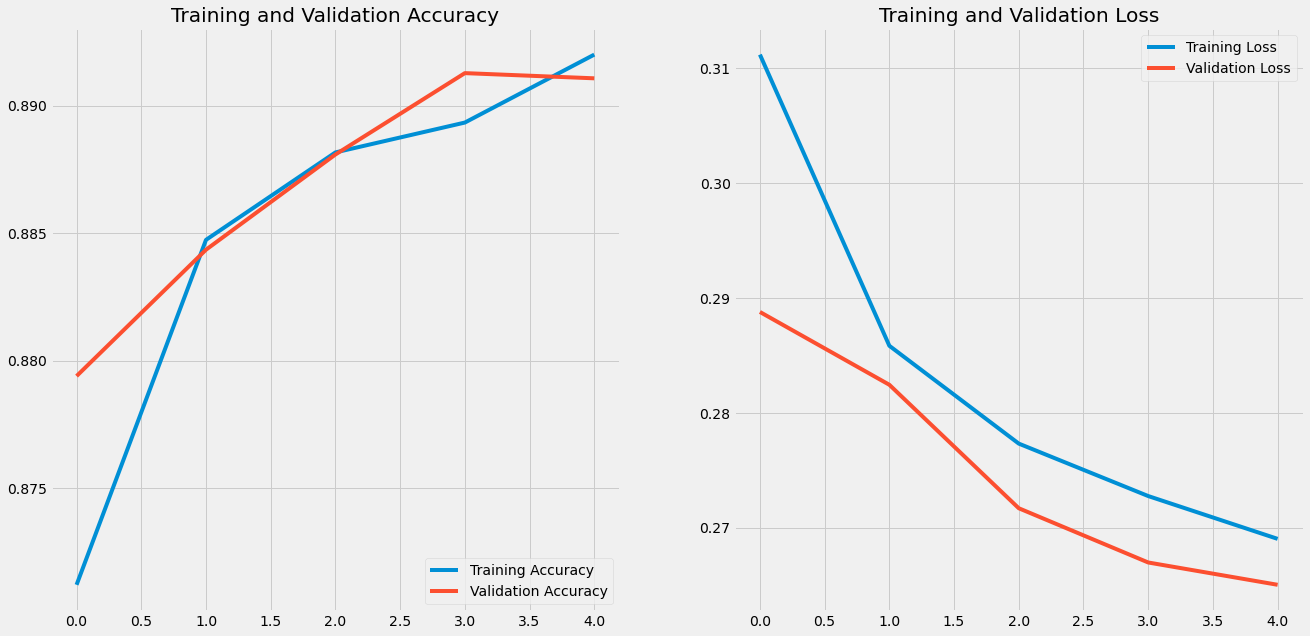

In [ ]:
## plotting loss and 
import matplotlib.pyplot as plt

train_acc =history.history['accuracy']
val_acc = history.history['val_accuracy']


train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



### Using Random Search to optimize the model



In [ ]:
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def tune_model(hp):
    model = Sequential()
    for n in range(hp.Int('num_layers', 2, 10, 15)):
        model.add(Dense(units=hp.Int('units_' + str(n),
                                     min_value=32,
                                     max_value=100,
                                     step=10),
                        activation = 'relu')
        )   
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(
        tf.keras.optimizers.Adam(
            lr = hp.Choice('learning_rate', [1e-1, 1e-2, 1e-3]) 
        ),
        loss = 'binary_crossentropy',
        metrics = ['accuracy']
    )
    return model

In [ ]:
tuner = RandomSearch(
    tune_model,
    objective = 'accuracy',
    max_trials = 5,
    executions_per_trial=2,
    directory = 'Bank Marketing',
    project_name = 'Bank Subscribers '
)

INFO:tensorflow:Reloading Oracle from existing project Bank Marketing/Bank Subscribers /oracle.json
INFO:tensorflow:Reloading Tuner from Bank Marketing/Bank Subscribers /tuner0.json


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 15, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 10, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 10, 'sampling': None}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001], 'ordered': True}


In [ ]:
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))
best_model = tuner.get_best_models()[0]

INFO:tensorflow:Oracle triggered exit


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
two_models = tuner.get_best_models(num_models=2)
best_model = two_models[0]
best_model.build(input_shape=(None,19))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
best_model.compile(
        tf.keras.optimizers.Adam(learning_rate=0.01),
        loss = 'binary_crossentropy',
        metrics = ['accuracy'])

best_model_history = best_model.fit(
                          X_train, y_train, 
                          epochs=20, 
                          validation_data=(X_test, y_test))

Epoch 1/20
1842/1842 [==============================] - 8s 4ms/step - loss: 0.2969 - accuracy: 0.8795 - val_loss: 0.2827 - val_accuracy: 0.8869
Epoch 2/20
1842/1842 [==============================] - 6s 3ms/step - loss: 0.2810 - accuracy: 0.8869 - val_loss: 0.2730 - val_accuracy: 0.8905
Epoch 3/20
1842/1842 [==============================] - 5s 3ms/step - loss: 0.2745 - accuracy: 0.8899 - val_loss: 0.2810 - val_accuracy: 0.8851
Epoch 4/20
1842/1842 [==============================] - 6s 3ms/step - loss: 0.2685 - accuracy: 0.8933 - val_loss: 0.2830 - val_accuracy: 0.8896
Epoch 5/20
1842/1842 [==============================] - 7s 4ms/step - loss: 0.2627 - accuracy: 0.8961 - val_loss: 0.2644 - val_accuracy: 0.8975
Epoch 6/20
1842/1842 [==============================] - 6s 3ms/step - loss: 0.2579 - accuracy: 0.8982 - val_loss: 0.2568 - val_accuracy: 0.8979
Epoch 7/20
1842/1842 [==============================] - 7s 4ms/step - loss: 0.2522 - accuracy: 0.9011 - val_loss: 0.2499 - val_accuracy:

In [ ]:
score_RS = best_model.evaluate(X_test, y_test)

461/461 [==============================] - 1s 2ms/step - loss: 0.2247 - accuracy: 0.9222


In [ ]:
y_pred_RS = best_model.predict(X_test)
y_pred_RS_NP = np.round(y_pred_RS)

print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_RS_NP))
print(classification_report(y_test,y_pred_RS_NP))
print('Random search Model Accuracy: ', accuracy_score(y_test, y_pred_RS_NP))

Confusion Matrix: 
 [[6255  976]
 [ 171 7332]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      7231
           1       0.88      0.98      0.93      7503

    accuracy                           0.92     14734
   macro avg       0.93      0.92      0.92     14734
weighted avg       0.93      0.92      0.92     14734

Random search Model Accuracy:  0.9221528437627257


In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 92)                1840      
                                                                 
 dense_1 (Dense)             (None, 52)                4836      
                                                                 
 dense_2 (Dense)             (None, 1)                 53        
                                                                 
Total params: 6,729
Trainable params: 6,729
Non-trainable params: 0
_________________________________________________________________


### COMPARISON BETWEEN THE BASE AND OPTIMIZED MODEL ON BALANCED DATASET

In [4]:
df = {'Models': ["Base", "Optimized"],
        "Train_acc": [0.8920, 0.9259],
        "Train_loss": [0.2690, 0.2045],
        "Train_Recall": [0.86, '-'],
        "Train_precision": [0.94, '-'],
        "Validation_acc": [0.8911, 0.9222],
        "Validation_loss": [0.2650, 0.2247],
        "Validation_Recall": [0.94, 0.98],
        "Validation_precision": [0.86, 0.93],
        "Epochs": [5, 20]
        }
model_comparison = pd.DataFrame(data = df)

# display the table of performance comparison
model_comparison

,Models,Train_acc,Train_loss,Train_Recall,Train_precision,Validation_acc,Validation_loss,Validation_Recall,Validation_precision,Epochs
0,Base,0.8920,0.2690,0.86,0.94,0.8911,0.2650,0.94,0.86,5
1,Optimized,0.9259,0.2045,-,-,0.9222,0.2247,0.98,0.93,20


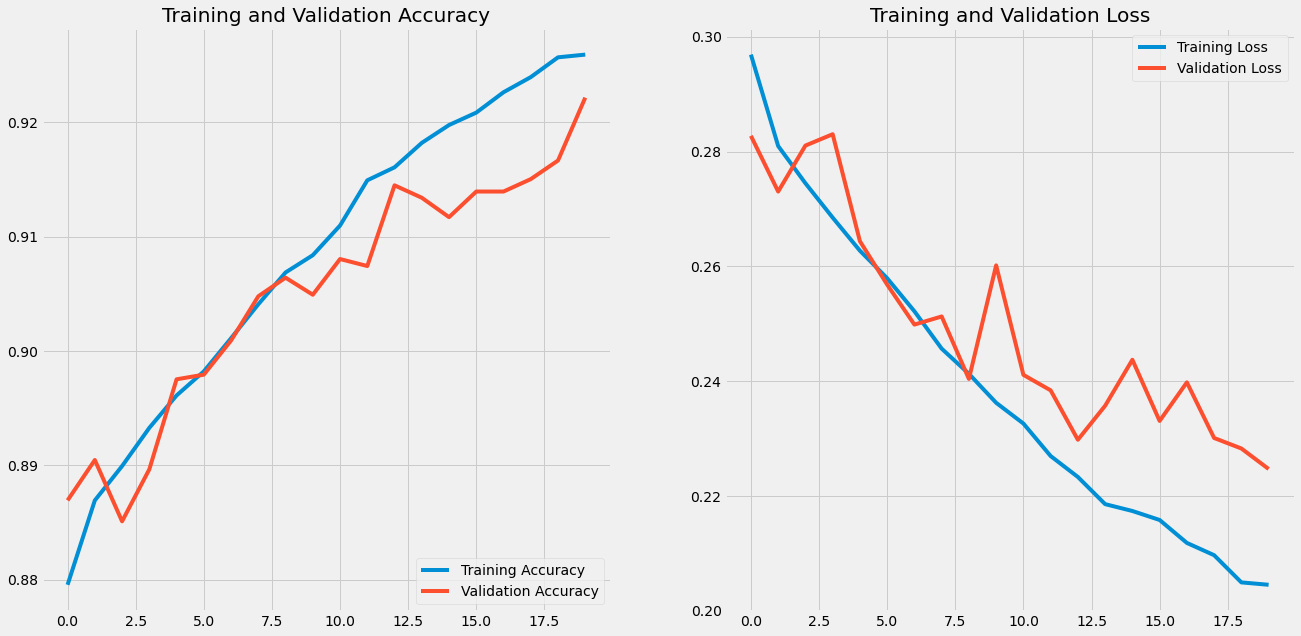

In [ ]:
best_train_acc = best_model_history.history['accuracy']
best_val_acc = best_model_history.history['val_accuracy']

#losses
best_train_loss = best_model_history.history['loss']
best_val_loss = best_model_history.history['val_loss']
epochs_range = range(20)
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, best_train_acc, label='Training Accuracy')
plt.plot(epochs_range, best_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, best_train_loss, label='Training Loss')
plt.plot(epochs_range, best_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model Development Using Traditional Machine Learning Models





### Modelling using Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT_clf = DecisionTreeClassifier()
DT_clf = DT_clf.fit(X_train,y_train)

y_pred_DT = DT_clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_DT))
print(classification_report(y_test,y_pred_DT))
print('Decision Tree Accuracy: ', accuracy_score(y_test, y_pred_DT))

Confusion Matrix: 
 [[6757  474]
 [   0 7503]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97      7231
           1       0.94      1.00      0.97      7503

    accuracy                           0.97     14734
   macro avg       0.97      0.97      0.97     14734
weighted avg       0.97      0.97      0.97     14734

Decision Tree Accuracy:  0.9678295099769241


### Modelling using Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB_clf = DecisionTreeClassifier()
NB_clf = NB_clf.fit(X_train,y_train)

y_pred_NB = NB_clf.predict(X_test)

In [ ]:
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_NB))
print(classification_report(y_test,y_pred_NB))
print('Naive Bayes Accuracy : ', accuracy_score(y_test, y_pred_NB))

Confusion Matrix: 
 [[6755  476]
 [   0 7503]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97      7231
           1       0.94      1.00      0.97      7503

    accuracy                           0.97     14734
   macro avg       0.97      0.97      0.97     14734
weighted avg       0.97      0.97      0.97     14734

Naive Bayes Accuracy :  0.9676937695126917


### Modelling using Logistic Regression




In [ ]:
from sklearn.linear_model import LogisticRegression

LR_clf = DecisionTreeClassifier()
LR_clf = LR_clf.fit(X_train,y_train)

y_pred_LR = LR_clf.predict(X_test)

In [ ]:
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_LR))
print(classification_report(y_test,y_pred_LR))
print('Logistic Regression Accuracy : ', accuracy_score(y_test, y_pred_LR))

Confusion Matrix: 
 [[6763  468]
 [   0 7503]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      7231
           1       0.94      1.00      0.97      7503

    accuracy                           0.97     14734
   macro avg       0.97      0.97      0.97     14734
weighted avg       0.97      0.97      0.97     14734

Logistic Regression Accuracy :  0.9682367313696213


### Modelling using Support Vector Machine

In [ ]:
from sklearn import svm

SVM_clf = svm.SVC(kernel='linear')
SVM_clf = SVM_clf.fit(X_train,y_train)
y_pred_SVM = SVM_clf.predict(X_test)

In [ ]:
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_SVM))
print(classification_report(y_test,y_pred_SVM))
print('Support Vector Machine Accuracy : ', accuracy_score(y_test, y_pred_SVM))

Confusion Matrix: 
 [[6014 1217]
 [ 775 6728]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      7231
           1       0.85      0.90      0.87      7503

    accuracy                           0.86     14734
   macro avg       0.87      0.86      0.86     14734
weighted avg       0.87      0.86      0.86     14734

Support Vector Machine Accuracy :  0.8648024976245419


## Metrics Comparision for Balanced Dataset

In [5]:
df2 = {'Models': ["Feed Forward NN", "Feed Forward NN with RandomSearh tuned hyperparameter", "Decision Tree","Naive Bayes","Logistic Regression","Support Vector Machine"],
        "Accuracy Score": [0.8911, 0.9222, 0.9678, 0.9672, 0.9688, 0.8648],
        "Precision": [86, 92, 97, 97, 97, 97],
        "Recall": [94, 93, 97, 97, 97, 87],
        "F1-score": [90, 92, 97, 97, 97, 87]}
        
model_comparison2 = pd.DataFrame(data = df2)

# display the table of performance comparison
model_comparison2

,Models,Accuracy Score,Precision,Recall,F1-score
0,Feed Forward NN,0.8911,86,94,90
1,Feed Forward NN with RandomSearh tuned hyperpa...,0.9222,92,93,92
2,Decision Tree,0.9678,97,97,97
3,Naive Bayes,0.9672,97,97,97
4,Logistic Regression,0.9688,97,97,97
5,Support Vector Machine,0.8648,97,87,87


# Reference


---



*   https://numpy.org/
*   https://scipy.org/
*   https://pandas.pydata.org/
*   https://matplotlib.org/
*   https://seaborn.pydata.org/
*   https://scikit-learn.org/stable/
*   https://www.tensorflow.org/
*   https://keras.io/keras_tuner/


